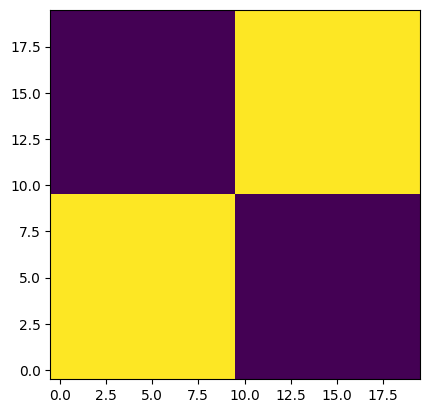

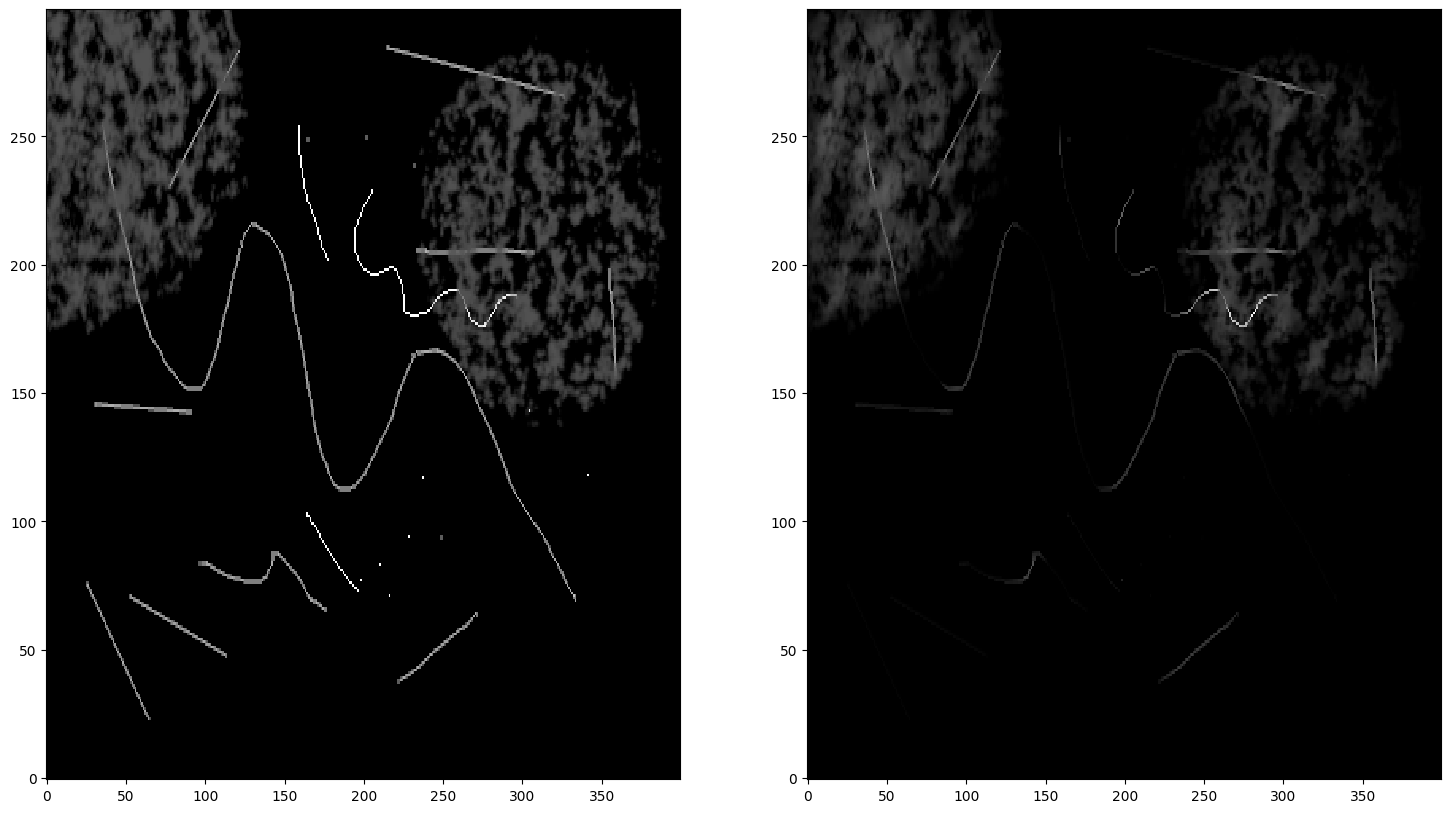

In [1]:
import scipy.ndimage
import scipy.signal
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.feature
import librosa

c = 10  # length of time continuous activation filter

def gen_kernel(c: int):
    kern = np.zeros((2*c,2*c))
    kern[c:, c:] = 1
    kern[:c, :c] = 1
    return kern    


# kernel = np.eye(2*c)
kernel = gen_kernel(c)


plt.imshow(kernel, origin='lower', interpolation='nearest')
plt.show()
H = Image.open('test.png').convert('L')
H = np.array(H)

H_filt = H * scipy.signal.convolve2d(
            H, kernel, mode="same"
        )

# H_filt = skimage.feature.canny(H, 5)
# H_filt = scipy.ndimage.gaussian_filter(H, 3)
# H_filt = scipy.ndimage.grey_closing(H, 2)

plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.imshow(H, origin='lower', aspect='auto', cmap='gray', interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(H_filt, origin='lower', aspect='auto', cmap='gray', interpolation='nearest')

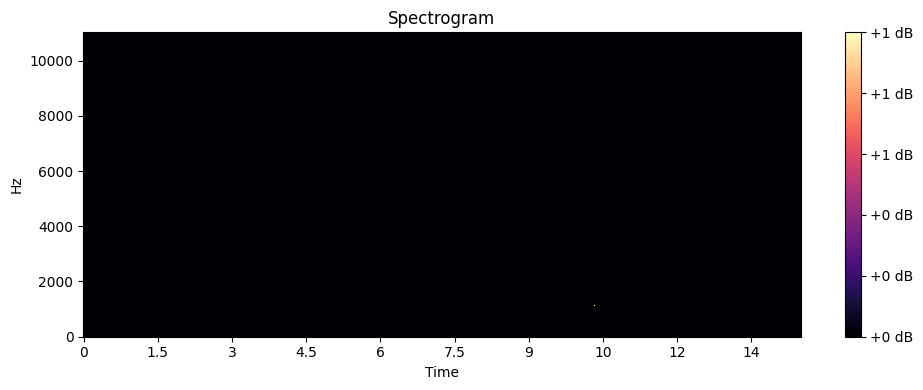

In [6]:
H = np.array(Image.open('H.bmp').convert('L'))

# Convert the image to decibels
H_db = librosa.amplitude_to_db(H, ref=np.max)

# Display the image using librosa.display.specshow
plt.figure(figsize=(10, 4))
librosa.display.specshow(H_db, x_axis='time', y_axis='linear', sr=22050)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()